# Анализ данных об оптовых продажах аудиотехники

**В данном проекте мне предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.**

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются.

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Мне необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами.
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`.**

In [ ]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kodin-lcj76-002ba/shared/homeworks/python_ds_miniprojects/final_project/data/orders'
way2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kodin-lcj76-002ba/shared/homeworks/python_ds_miniprojects/final_project/data/products'

orders_paths = []
orders_status_paths = []
products_paths = []

for path, dirs, files in os.walk(way):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        if file.endswith('orders.csv'):
            file_path = os.path.join(path, file)
            orders_paths.append(file_path)
        if file.endswith('order_status.csv'):
            file_path = os.path.join(path, file)
            orders_status_paths.append(file_path)

for path, dirs, files in os.walk(way2):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        if file.endswith('products.csv'):
            file_path = os.path.join(path, file)
            products_paths.append(file_path)


In [ ]:
df_orders = pd.DataFrame()
df_order_status = pd.DataFrame()
df_products = pd.DataFrame()

for i in orders_paths:
    data = pd.read_csv(i)
    manager = i.split('/')[-2]
    date = i.split('/')[-3]
    data['manager'] = manager
    data['date'] = date
    df_orders = pd.concat([data, df_orders], ignore_index=True)

for i in orders_status_paths:
    data = pd.read_csv(i)
    df_order_status = pd.concat([data, df_order_status], ignore_index=True)


for i in products_paths:
    data = pd.read_csv(i)
    category = i.split('/')[-2]
    data['category'] = category
    df_products = pd.concat([data, df_products], ignore_index=True)

print(df_orders.shape)
print(df_order_status.shape)
print(df_products.shape)


(4603, 5)
(346, 3)
(1677, 4)


In [ ]:
df_products.head()

,id,name,price,category
0,26,"Anker, Soundcore Liberty Neo",35.92,Беспроводные наушники
1,27,"Anker, Soundcore Life Q10",33.82,Беспроводные наушники
2,28,"Anker, Soundcore Liberty 2 Pro",126.79,Беспроводные наушники
3,29,"Anker, Soundcore Liberty Air",72.11,Беспроводные наушники
4,30,"Anker, Soundcore Liberty Air 2",86.96,Беспроводные наушники


In [ ]:
df_orders.to_csv("df_orders.csv", index=False)
df_order_status.to_csv("df_order_status.csv", index=False)
df_products.to_csv("df_products.csv", index=False)

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

In [ ]:
df_orders['date'] = df_orders['date'].apply(pd.to_datetime)
count_orders = df_orders.groupby('date', as_index=False).size().sort_values('size', ascending=False)
count_orders

,date,size
13,2024-03-14,437
12,2024-03-13,339
0,2024-03-01,302
28,2024-03-29,241
25,2024-03-26,231
14,2024-03-15,225
4,2024-03-05,222
19,2024-03-20,222
5,2024-03-06,221
26,2024-03-27,203


**День с наибольшим числом заказов - 2024-03-14**

## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

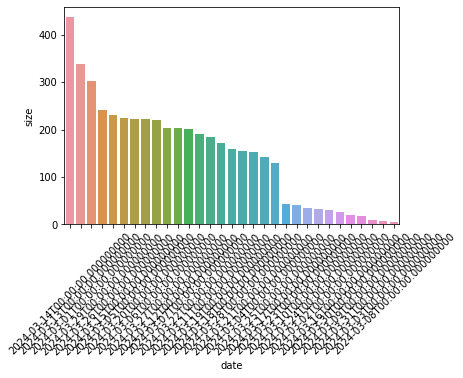

In [ ]:
sns.barplot(x = count_orders['date'], y = count_orders['size'])
plt.xticks(rotation=45)

**Ответ - по выходным почти нет заказов.**

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

**Это день 2024-03-08. Обычно в пятницу много заказов, но пятница 8 марта - это праздничный нерабочий день, поэтому в этот день было мало заказов.**

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах.**

In [ ]:
orders_status = df_orders.merge(df_order_status, on='order_id')
orders_status.to_csv("orders_status.csv", index=False)
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,UAKD-95751033,580,6,Ксения Балалайкина,2024-03-26,61,confirmed
1,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
2,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
3,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed
...,...,...,...,...,...,...,...
4598,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4599,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
4600,QPLK-54839036,1309,5,Владимир Ударников,2024-03-10,52,confirmed
4601,QPLK-54839036,134,4,Владимир Ударников,2024-03-10,52,confirmed


## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

In [ ]:
orders_status[['order_id', 'status']].drop_duplicates().status.value_counts()


confirmed    309
canceled      37
Name: status, dtype: int64

In [ ]:
orders_status[['order_id', 'status']].drop_duplicates().status.value_counts(normalize=True).round(2)

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

**Доля отмененных заказов - 0.11**

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

In [ ]:
gr = orders_status.groupby(['date', 'status'], as_index=False).size()
pivot_orders = gr.pivot_table(index='date', columns='status', values='size').fillna(0)
pivot_orders['canceled'] = pivot_orders['canceled'].astype(int)
pivot_orders['confirmed'] = pivot_orders['confirmed'].astype(int)
pivot_orders

status,canceled,confirmed
date,,
2024-03-01,29,273
2024-03-02,0,30
2024-03-03,0,8
2024-03-04,0,143
2024-03-05,0,222
2024-03-06,12,209
2024-03-07,5,196
2024-03-08,0,5
2024-03-09,18,0


**День, когда не было ни одного подтвержденного заказа - 2024-03-09**

## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<Figure size 864x432 with 0 Axes>

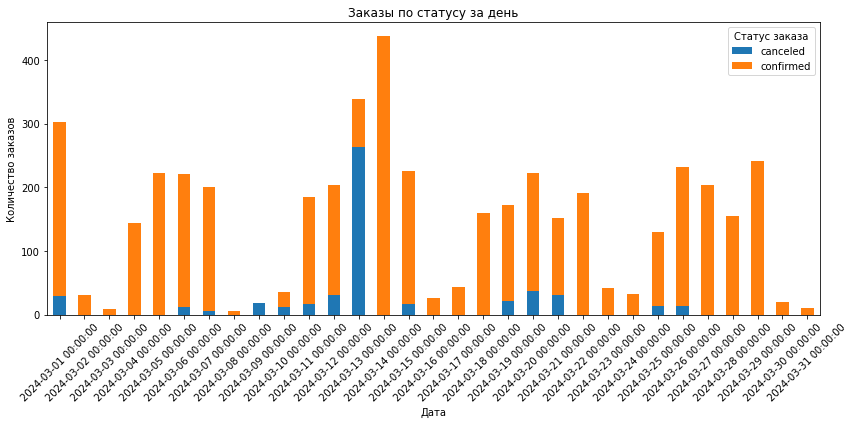

In [ ]:
plt.figure(figsize=(12, 6))
pivot_orders.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Заказы по статусу за день")
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.legend(title="Статус заказа")
plt.tight_layout()
plt.show()

**Ответ:**
- **В день с наибольшим числом заказов было много успешно оформленных заказов**
- **В день, предшествующий дню с наибольшим числом заказов, было много отмен**

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

In [ ]:
df_canceled_march_13 = orders_status\
    .loc[(orders_status['date'] == '2024-03-13') & (orders_status['status'] == 'canceled')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_confirmed_march_14 = orders_status\
    .loc[(orders_status['date'] == '2024-03-14') & (orders_status['status'] == 'confirmed')] \
    .groupby(['order_id'], as_index=False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})

df_canceled_and_again_confirmed = pd.merge(df_canceled_march_13, df_confirmed_march_14,
                                  on=['product_id','manager', 'client_id', 'quantity'],
                                  how='inner')

df_canceled_and_again_confirmed.shape[0] / df_confirmed_march_14.shape[0]

0.47058823529411764

**Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние**

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

In [ ]:
with open('usd_rate.txt', 'r') as file:
    currency = file.readlines()


df_dollar = pd.DataFrame(currency, columns=['data'])
df_dollar['date'] = df_dollar['data'].apply(lambda x: x.split(",")[0])  # Получаем дату (первое значение)
df_dollar['currency_rate'] = df_dollar['data'].apply(lambda x: x.split(',')[1])  # Получаем курс валюты (второе значение)
df_dollar = df_dollar.drop(columns=['data'])
df_dollar['date'] = df_dollar['date'].apply(pd.to_datetime)
df_dollar.currency_rate = df_dollar.currency_rate.astype(float)
#df_dollar.currency_rate.mean().round(2)
df_dollar

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [ ]:
df_dollar.currency_rate.mean().round(2)

91.7

**Среднее значение курса доллара - 91.7**

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

In [ ]:
df_full = pd.merge(orders_status, df_products,
                                  left_on='product_id', right_on='id',
                                  how='inner')
df_full = pd.merge(df_full, df_dollar,
                                  on='date',
                                  how='inner')
df_full = df_full.drop(columns=['id'])

df_full['price_rub'] = (df_full.price * df_full.currency_rate)
df_full['revenue'] = (df_full.price_rub * df_full.quantity)
df_confirmed = df_full.query('status == "confirmed"')
average_revenue = df_confirmed.revenue.sum().round(2)
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,UAKD-95751033,580,6,Ксения Балалайкина,2024-03-26,61,confirmed,"JBL, PartyBox 300",440.53,Музыкальный центр,92.7761,40870.655333,2.452239e+05
1,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,"Klipsch, Cinema 400",246.34,Саундбар,92.7761,22854.464474,5.485071e+05
2,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761,152194.553245,1.369751e+06
3,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761,42881.113420,2.572867e+05
4,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761,81598.435472,2.447953e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,HCNJ-19162518,556,24,Максим Барабанов,2024-03-08,54,confirmed,"JBL, PartyBox 100",308.99,Беспроводная акустика,90.7493,28040.626207,6.729750e+05
4599,HCNJ-19162518,1594,10,Максим Барабанов,2024-03-08,54,confirmed,"Yamaha, TW-E5A",170.30,Беспроводные наушники,90.7493,15454.605790,1.545461e+05
4600,HCNJ-19162518,520,5,Максим Барабанов,2024-03-08,54,confirmed,"Heco, KaraFun 100",172.11,Система караоке,90.7493,15618.862023,7.809431e+04
4601,HCNJ-19162518,601,5,Максим Барабанов,2024-03-08,54,confirmed,"JBL, Quantum 300",71.28,Наушники с микрофоном,90.7493,6468.610104,3.234305e+04


In [ ]:
print(average_revenue)

2038231821.56


**Общая выручка - 2 038 231 821 руб.**

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

In [ ]:
# Ваш код здесь
unique_orders = df_full.query('status == "confirmed"').order_id.nunique()
average_check = (average_revenue / unique_orders).round(2)
average_check

6596219.49

**Средний чек в этом месяце - 6 596 219 руб.**

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

In [ ]:
df_report_by_date = df_confirmed.query('status == "confirmed"').groupby('date').agg({'order_id':'nunique', 'revenue':'sum'},
                                                                                   as_index = False)
df_report_by_date = df_report_by_date.rename(columns={'order_id':'orders'})
df_report_by_date['avg_check'] = (df_report_by_date.revenue / df_report_by_date.orders).round(2)
df_report_by_date = df_report_by_date.reset_index()
df_report_by_date

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


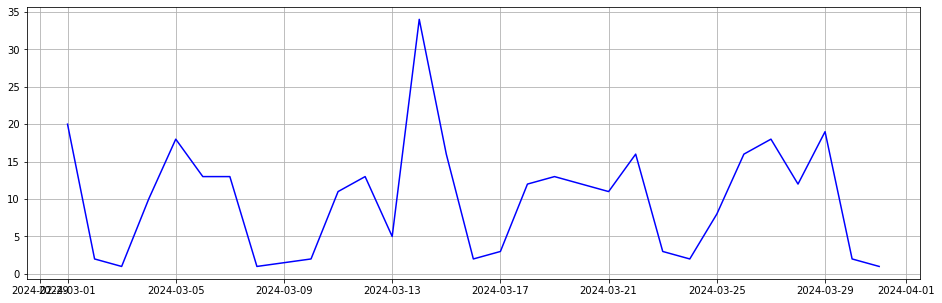

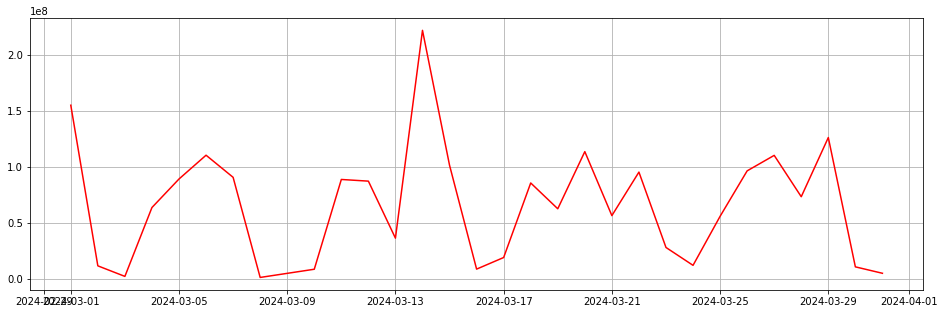

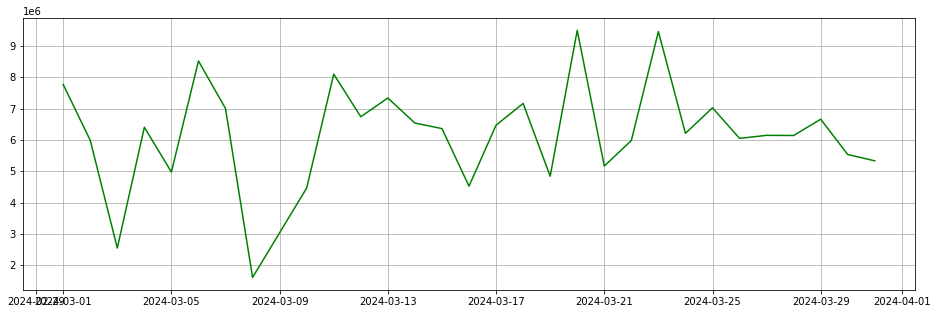

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(df_report_by_date.date, df_report_by_date.orders, c='b')
plt.grid(True)

plt.figure(figsize=(16, 5))
plt.plot(df_report_by_date.date, df_report_by_date.revenue, c='r')
plt.grid(True)

plt.figure(figsize=(16, 5))
plt.plot(df_report_by_date.date, df_report_by_date.avg_check, c='g')
plt.grid(True)

**Ответ:**
- **число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)**
- **средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)**
- **в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение**
- **с течением времени выручка то увеличивается, то уменьшается**
- **на протяжении всего месяца средний чек то увеличивается, то уменьшается**

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

In [ ]:
df_full['brand'] = df_full['name'].apply(lambda x: x.split(",")[0])
df_full.brand.nunique()

121

**Клиенты интересовались 121 брендом.**

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

In [ ]:
df_full.query('status == "confirmed"') \
        .groupby('brand', as_index=False) \
        .agg({'revenue':'sum', 'order_id':'nunique'}) \
        .sort_values('order_id', ascending=False)

,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
120,Yamaha,1.658651e+08,218
53,Klipsch,2.039024e+08,205
62,Magnat,1.141989e+08,154
...,...,...,...
52,Karaoke USA,1.639025e+05,1
24,Creative,1.001419e+04,1
97,Sonance,7.991302e+05,1
107,Technics,2.648291e+05,1


**Бренд *JBL* принес наибольшую выручку.**

## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

In [ ]:
list_unique = df_confirmed.product_id.unique()
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in list_unique else 'no')
df_products.groupby('is_in_orders').size()

is_in_orders
no      497
yes    1180
dtype: int64

**Были заказаны - 1180 товаров**

**Не были заказаны - 497 товаров**

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда:
- AKG  
- ASUS
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

In [ ]:
df_products['brand'] = df_products['name'].apply(lambda x: x.split(",")[0])
group = df_products.groupby(['brand', 'is_in_orders']).agg({'id':'nunique'}, as_index=False).reset_index().rename(columns={'id':'products'})

pivot_products = group.pivot_table(index='brand', columns='is_in_orders', values='products').fillna(0)
pivot_products.reset_index(inplace=True)
pivot_products['sum_brands'] = pivot_products.no + pivot_products.yes
pivot_products['dole'] = (pivot_products.no / pivot_products.sum_brands).round(2)
pivot_products.query('sum_brands > 15 and dole > 0.5')

is_in_orders,brand,no,yes,sum_brands,dole
32,Dali,49.0,18.0,67.0,0.73
60,KEF,54.0,28.0,82.0,0.66
77,Marantz,19.0,3.0,22.0,0.86
94,Pioneer,70.0,33.0,103.0,0.68


**Бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда:**
- **Dali**
- **KEF**
- **Marantz**
- **Pioneer**

### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

In [ ]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,UAKD-95751033,580,6,Ксения Балалайкина,2024-03-26,61,confirmed,"JBL, PartyBox 300",440.53,Музыкальный центр,92.7761,40870.655333,2.452239e+05
1,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed,"Klipsch, Cinema 400",246.34,Саундбар,92.7761,22854.464474,5.485071e+05
2,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon 7 C",1640.45,Напольная акустика,92.7761,152194.553245,1.369751e+06
3,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed,"Dali, Oberon Vokal",462.20,Центральный канал,92.7761,42881.113420,2.572867e+05
4,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed,"Pioneer, Elite VSX-LX503",879.52,AV-ресивер,92.7761,81598.435472,2.447953e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,HCNJ-19162518,556,24,Максим Барабанов,2024-03-08,54,confirmed,"JBL, PartyBox 100",308.99,Беспроводная акустика,90.7493,28040.626207,6.729750e+05
4599,HCNJ-19162518,1594,10,Максим Барабанов,2024-03-08,54,confirmed,"Yamaha, TW-E5A",170.30,Беспроводные наушники,90.7493,15454.605790,1.545461e+05
4600,HCNJ-19162518,520,5,Максим Барабанов,2024-03-08,54,confirmed,"Heco, KaraFun 100",172.11,Система караоке,90.7493,15618.862023,7.809431e+04
4601,HCNJ-19162518,601,5,Максим Барабанов,2024-03-08,54,confirmed,"JBL, Quantum 300",71.28,Наушники с микрофоном,90.7493,6468.610104,3.234305e+04


In [ ]:
managers = df_confirmed.query('status == "confirmed"') \
                       .groupby('manager', as_index=False) \
                       .agg({'revenue':'sum', 'order_id':'nunique'}) \
                       .rename(columns={'order_id':'orders'}) \
                       .sort_values('revenue', ascending=False)
sum_revenue = managers.revenue.sum()
sum_orders = managers.orders.sum()
managers['percent_revenue'] = ((managers.revenue / sum_revenue) * 100).round(2)
managers['percent_orders'] = ((managers.orders / sum_orders) * 100).round(2)
managers

,manager,revenue,orders,percent_revenue,percent_orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

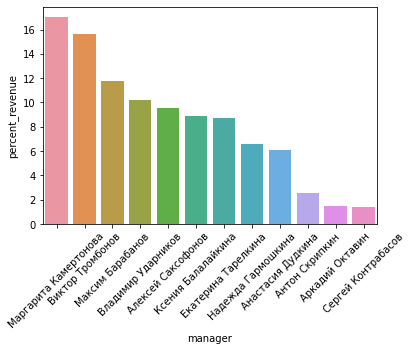

In [ ]:
sns.barplot(x = managers.manager, y = managers.percent_revenue)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

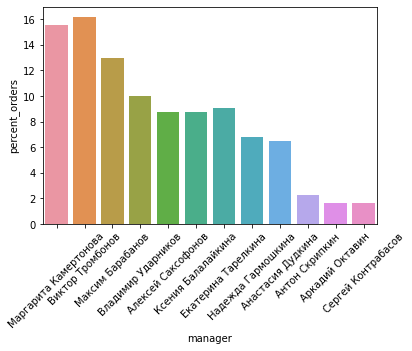

In [ ]:
sns.barplot(x = managers.manager, y = managers.percent_orders)
plt.xticks(rotation=45)

**Ответы:**
- **лучшим менеджером по % выручки стала Маргарита Камертонова**
- **в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных**
- **лидер по % заказов реализовал более 16% заказов**
- **наихудшие показатели у Сергея Контрабасова**
- **Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина**

## Итоги

В данном проекте мы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке».